# 可视化训练日志

训练模型时在`work_dirs`目录生成记录训练日志，解析其中损失函数、评估指标等信息，并可视化。

同济子豪兄：https://space.bilibili.com/1900783

## 设置Matplotlib中文字体

In [1]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [2]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [5]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
#!rm -rf /home/featurize/.cache/matplotlib

import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体


/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf: No such file or directory


findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

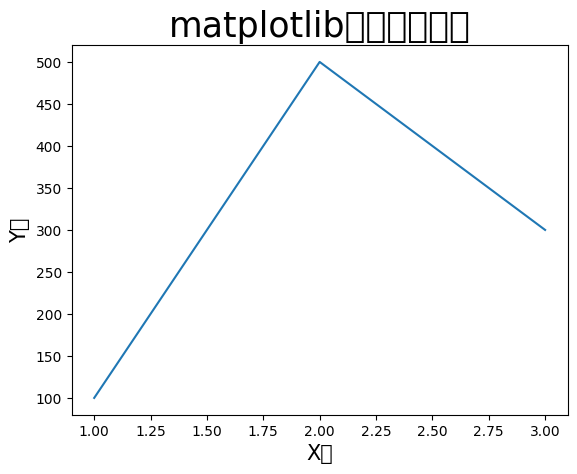

In [6]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 进入MMSegmentation主目录

In [1]:
import os
os.chdir('/gemini/code/MMSegmentation_Tutorials/20230612/mmsegmentation')

In [2]:
os.getcwd()

'/gemini/code/MMSegmentation_Tutorials/20230612/mmsegmentation'

## 导入工具包

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## 载入训练日志

In [10]:
# 日志文件路径
log_path = 'work_dirs/WatermelonDataset/20230618_183452/vis_data/20230618_183452.json'

In [11]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [12]:
len(json_list)

38

In [13]:
eval(json_list[4])

{'lr': 0.009911076035273796,
 'data_time': 0.009933686256408692,
 'loss': 0.06631477363407612,
 'decode.loss_ce': 0.047321477346122263,
 'decode.acc_seg': 85.028076171875,
 'aux.loss_ce': 0.018993296567350625,
 'aux.acc_seg': 81.18896484375,
 'time': 0.44489541053771975,
 'iter': 400,
 'memory': 3615,
 'step': 400}

In [15]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in json_list[:-1]:
    if 'aAcc' in each:
        df_test = df_test._append(eval(each), ignore_index=True)
    else:
        df_train = df_train._append(eval(each), ignore_index=True)

In [16]:
df_train

,lr,data_time,loss,decode.loss_ce,decode.acc_seg,aux.loss_ce,aux.acc_seg,time,iter,memory,step
0,0.009999,0.009033,0.146332,0.103495,37.448120,0.042836,32.839966,1.315125,6.0,3615.0,6.0
1,0.009978,0.010203,0.068514,0.047162,80.249023,0.021352,85.052490,0.466965,100.0,3615.0,100.0
2,0.009956,0.009833,0.070168,0.047719,77.713013,0.022449,66.955566,0.539683,200.0,3615.0,200.0
3,0.009933,0.010020,0.057299,0.040279,80.300903,0.017020,79.299927,0.390603,300.0,3615.0,300.0
4,0.009911,0.009934,0.066315,0.047321,85.028076,0.018993,81.188965,0.444895,400.0,3615.0,400.0
5,0.009889,0.010343,0.051502,0.036398,77.328491,0.015104,80.932617,0.510368,500.0,3615.0,500.0
6,0.009866,0.010494,0.053198,0.038265,79.418945,0.014933,84.609985,0.694550,600.0,3615.0,600.0
7,0.009844,0.009825,0.044093,0.031609,91.275024,0.012484,88.876343,0.579894,700.0,3615.0,700.0
8,0.009822,0.009234,0.041247,0.028478,84.643555,0.012769,81.475830,0.822972,800.0,3615.0,800.0
9,0.009800,0.010468,0.040041,0.027961,81.353760,0.012080,82.162476,0.488986,900.0,3615.0,900.0


In [17]:
df_test

,aAcc,mIoU,mAcc,data_time,time,step
0,60.67,15.75,22.70,0.193740,1.436263,400.0
1,71.79,31.02,37.06,0.009401,0.307077,800.0
2,68.60,23.40,29.28,0.007875,0.379760,1200.0
3,75.92,38.54,45.43,0.008708,0.431139,1600.0
4,74.31,35.80,41.41,0.008540,0.366503,2000.0
5,74.33,30.09,35.61,0.009091,0.370658,2400.0
6,82.07,44.44,49.77,0.007930,0.363321,2800.0


## 导出训练日志表格

In [21]:
df_train.to_csv('训练日志-训练集.csv', index=False)
df_test.to_csv('训练日志-测试集.csv', index=False)

## 可视化辅助函数

In [22]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

## 训练集损失函数

In [23]:
metrics = ['loss', 'decode.loss_ce', 'aux.loss_ce']

/tmp/ipykernel_179/829671210.py:11: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from current font.
  plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_179/829671210.py:11: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from current font.
  plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_179/829671210.py:11: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from current font.
  plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_179/829671210.py:11: UserWarning: Glyph 25439 (\N{CJK UNIFIED IDEOGRAPH-635F}) missing from current font.
  plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_179/829671210.py:11: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from current font.
  plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_179/829671210.py:11: UserWarning: Glyph 20989 (\N{CJK UNIFIED IDEOGRAPH-51FD}) missin

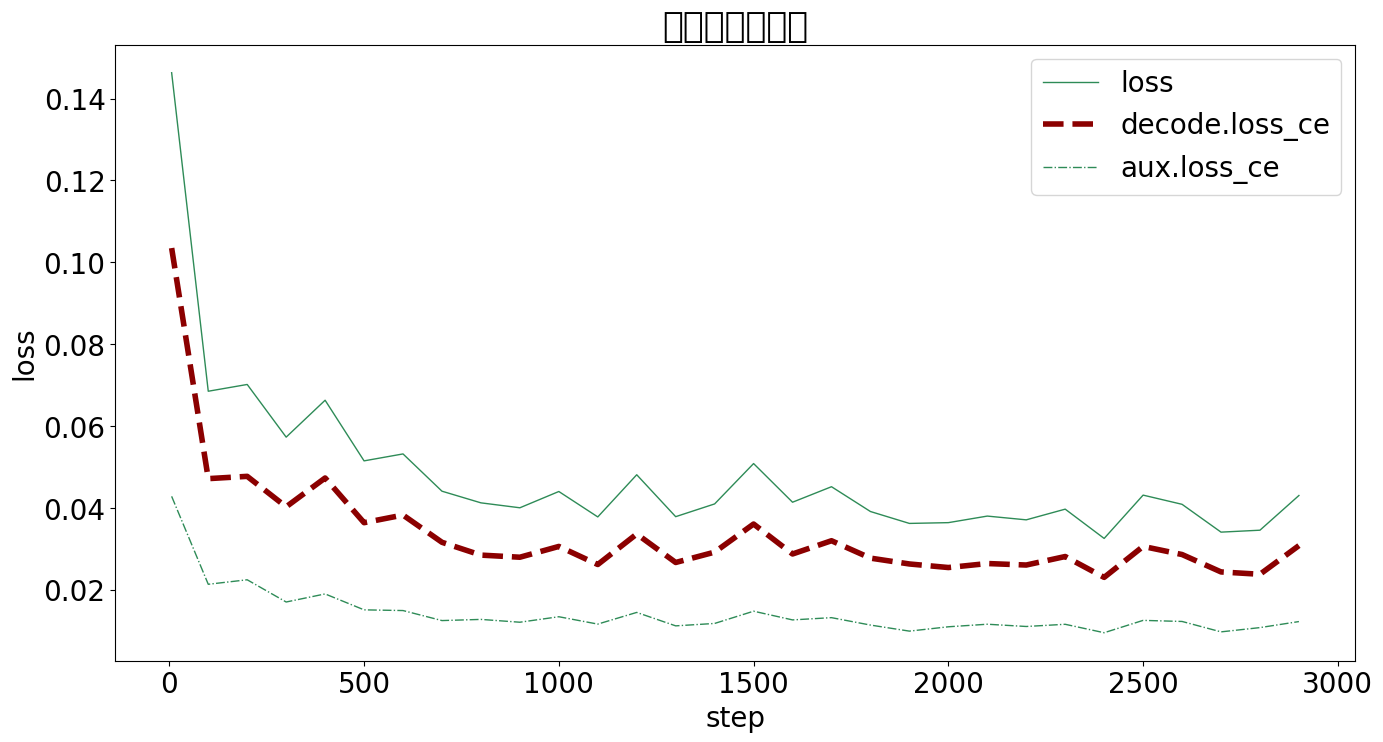

In [24]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)
plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 训练集准确率

In [25]:
df_train.columns

Index(['lr', 'data_time', 'loss', 'decode.loss_ce', 'decode.acc_seg',
       'aux.loss_ce', 'aux.acc_seg', 'time', 'iter', 'memory', 'step'],
      dtype='object')

In [26]:
metrics = ['decode.acc_seg', 'aux.acc_seg']

/tmp/ipykernel_179/2287259432.py:11: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from current font.
  plt.savefig('训练集准确率.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_179/2287259432.py:11: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from current font.
  plt.savefig('训练集准确率.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_179/2287259432.py:11: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from current font.
  plt.savefig('训练集准确率.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_179/2287259432.py:11: UserWarning: Glyph 20934 (\N{CJK UNIFIED IDEOGRAPH-51C6}) missing from current font.
  plt.savefig('训练集准确率.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_179/2287259432.py:11: UserWarning: Glyph 30830 (\N{CJK UNIFIED IDEOGRAPH-786E}) missing from current font.
  plt.savefig('训练集准确率.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_179/2287259432.py:11: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missi

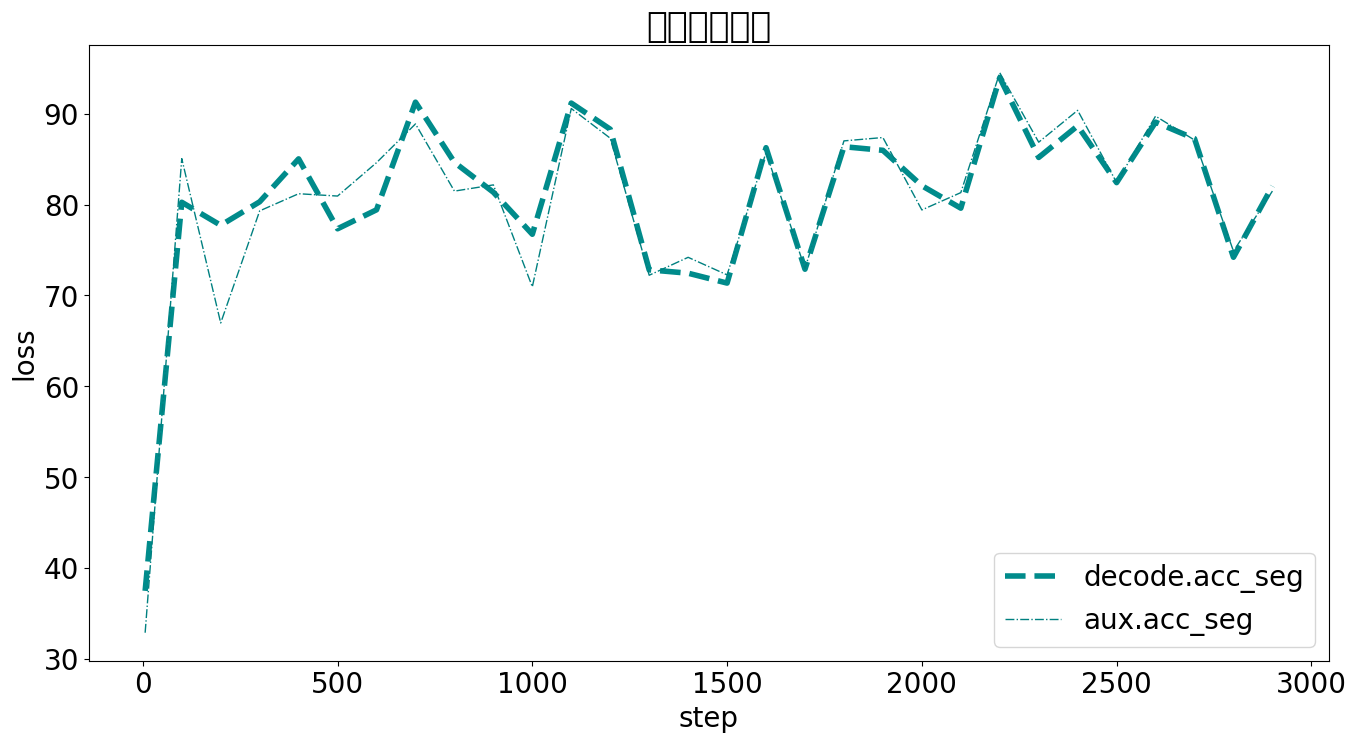

In [27]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集准确率', fontsize=25)
plt.savefig('训练集准确率.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 测试集评估指标

In [28]:
df_test.columns

Index(['aAcc', 'mIoU', 'mAcc', 'data_time', 'time', 'step'], dtype='object')

In [29]:
metrics = ['aAcc', 'mIoU', 'mAcc']

/tmp/ipykernel_179/2439649103.py:12: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from current font.
  plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_179/2439649103.py:12: UserWarning: Glyph 35797 (\N{CJK UNIFIED IDEOGRAPH-8BD5}) missing from current font.
  plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_179/2439649103.py:12: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from current font.
  plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_179/2439649103.py:12: UserWarning: Glyph 35780 (\N{CJK UNIFIED IDEOGRAPH-8BC4}) missing from current font.
  plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_179/2439649103.py:12: UserWarning: Glyph 20272 (\N{CJK UNIFIED IDEOGRAPH-4F30}) missing from current font.
  plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_179/2439649103.py:12: UserWarning: Glyph 25351 (\N{CJK UNIFIED IDEOGRA

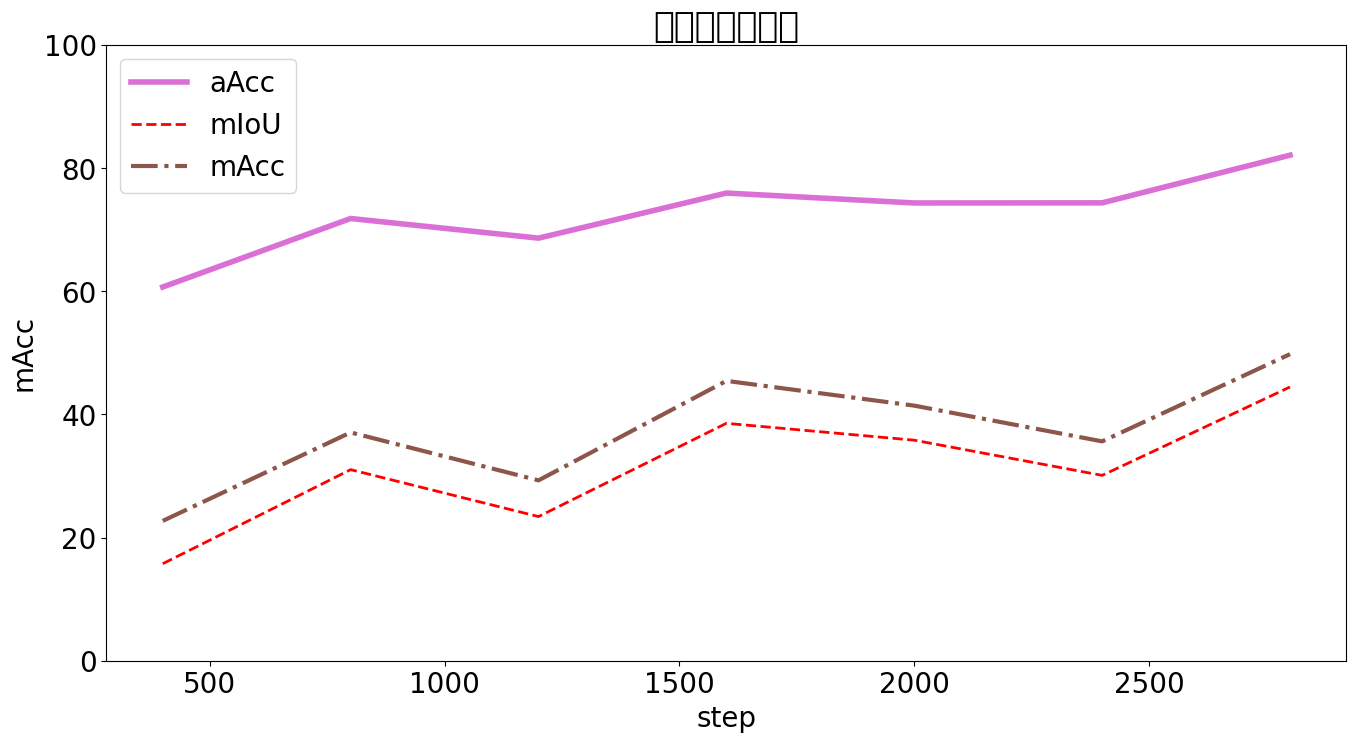

In [30]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.ylim([0, 100])
plt.xlabel('step', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()